In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
incidents_df = pd.read_csv('data/incidents.csv')
incidents_df.head()


,Incident_ID,Customer_ID,Age,Gender,Season,Weather,Activity,Slope_Name,Slope_Difficulty,Skill_Level,Protective_Gear,Injuries,Injury_Severity,Response_Time,Hospital_Transport,Hospital_Stay_Length
0,0,2679,33,Male,Winter,Foggy,Skiing,Bunny Hill,Easy,Beginner,Helmet,Sprain,6,15,No,0
1,1,4257,36,Female,Summer,Sunny,Hiking,Devil’s Drop,Expert,Beginner,Helmet,Fracture,6,23,No,0
2,2,7924,47,Female,Winter,Foggy,Snowboarding,Thunder Run,Advanced,Beginner,Helmet,Sprain,8,13,Yes,1
3,3,7224,56,Male,Summer,Sunny,Hiking,Thunder Run,Advanced,Intermediate,Helmet,Fracture,5,9,No,0
4,4,9785,17,Male,Summer,Windy,Climbing,Blue Ridge,Intermediate,Beginner,NaN,Head Injury,8,10,Yes,4


In [7]:
incidents_df.describe()

,Incident_ID,Customer_ID,Age,Injury_Severity,Response_Time,Hospital_Stay_Length
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,5627.834000,37.122000,5.631000,14.238000,0.357000
std,288.819436,2589.633228,12.906343,1.950036,3.754924,0.991228
min,0.000000,1022.000000,15.000000,2.000000,6.000000,0.000000
25%,249.750000,3368.500000,26.000000,4.000000,11.000000,0.000000
50%,499.500000,5753.000000,38.000000,6.000000,14.000000,0.000000
75%,749.250000,7835.250000,49.000000,7.000000,17.000000,0.000000
max,999.000000,9991.000000,59.000000,10.000000,28.000000,4.000000


In [8]:
incidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Incident_ID           1000 non-null   int64 
 1   Customer_ID           1000 non-null   int64 
 2   Age                   1000 non-null   int64 
 3   Gender                1000 non-null   object
 4   Season                1000 non-null   object
 5   Weather               1000 non-null   object
 6   Activity              1000 non-null   object
 7   Slope_Name            1000 non-null   object
 8   Slope_Difficulty      1000 non-null   object
 9   Skill_Level           1000 non-null   object
 10  Protective_Gear       651 non-null    object
 11  Injuries              1000 non-null   object
 12  Injury_Severity       1000 non-null   int64 
 13  Response_Time         1000 non-null   int64 
 14  Hospital_Transport    1000 non-null   object
 15  Hospital_Stay_Length  1000 non-null   i

In [9]:
missing_df = incidents_df[incidents_df['Protective_Gear'].isna()]

In [10]:
print(missing_df)

     Incident_ID  Customer_ID  Age  Gender  Season Weather      Activity  \
4              4         9785   17    Male  Summer   Windy      Climbing   
5              5         4150   53    Male  Summer   Windy        Hiking   
7              7         2169   58    Male  Summer   Rainy        Hiking   
8              8         4598   31  Female  Winter   Windy        Skiing   
10            10         3340   32  Female  Summer   Windy        Hiking   
..           ...          ...  ...     ...     ...     ...           ...   
987          987         5473   17    Male  Winter   Foggy  Snowboarding   
992          992         5967   19    Male  Winter   Foggy  Snowboarding   
994          994         9093   39    Male  Winter   Sunny  Snowboarding   
995          995         3087   55  Female  Winter   Sunny        Skiing   
997          997         6292   16  Female  Summer   Rainy        Hiking   

        Slope_Name Slope_Difficulty   Skill_Level Protective_Gear  \
4       Blue Ridge

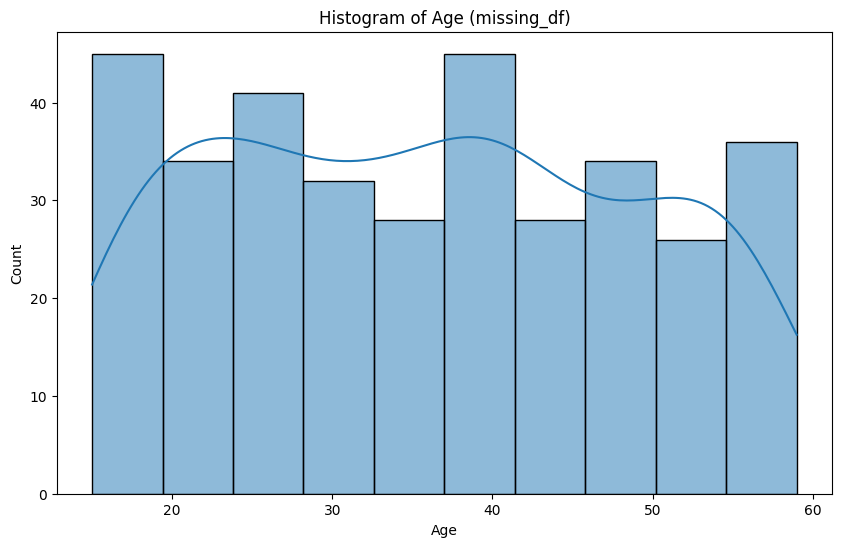

<Figure size 640x480 with 0 Axes>

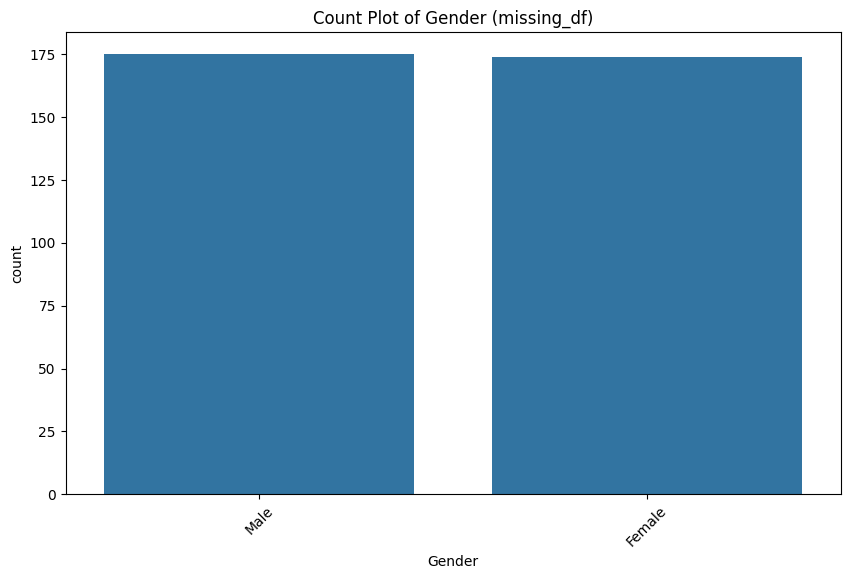

<Figure size 640x480 with 0 Axes>

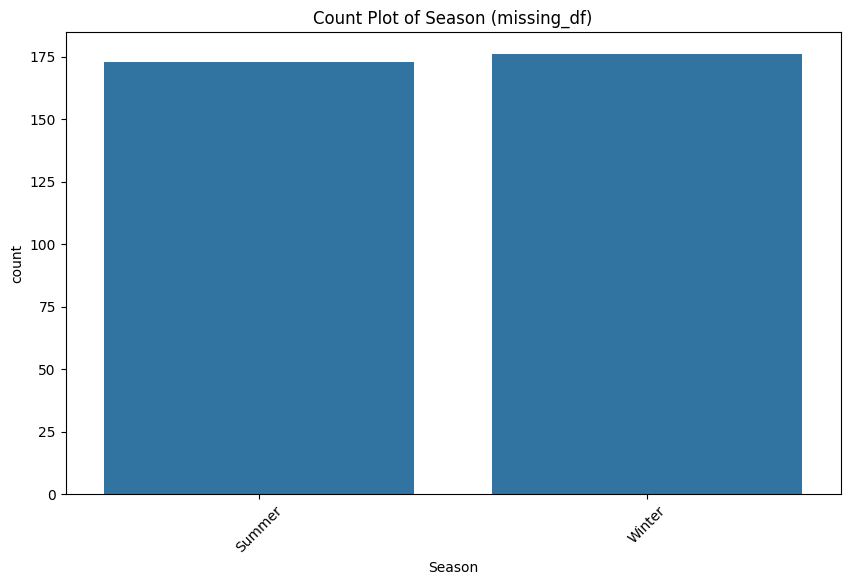

<Figure size 640x480 with 0 Axes>

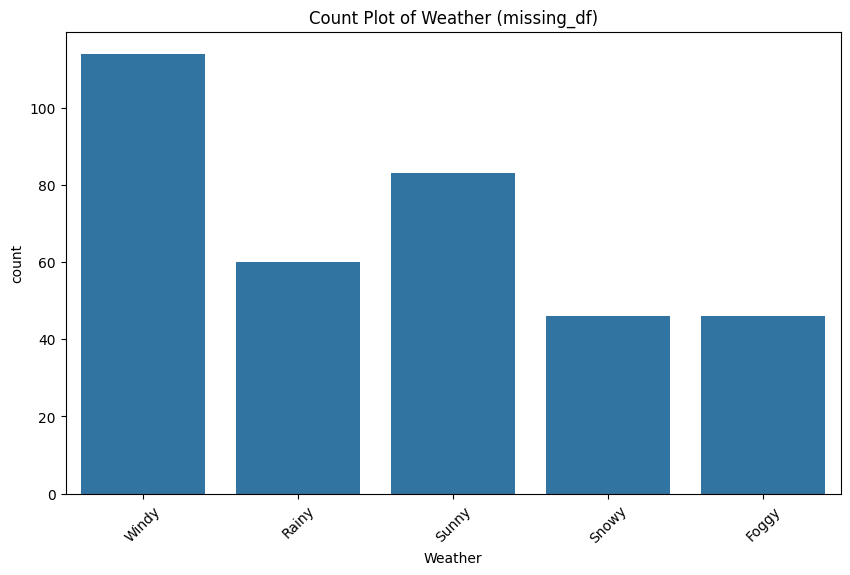

<Figure size 640x480 with 0 Axes>

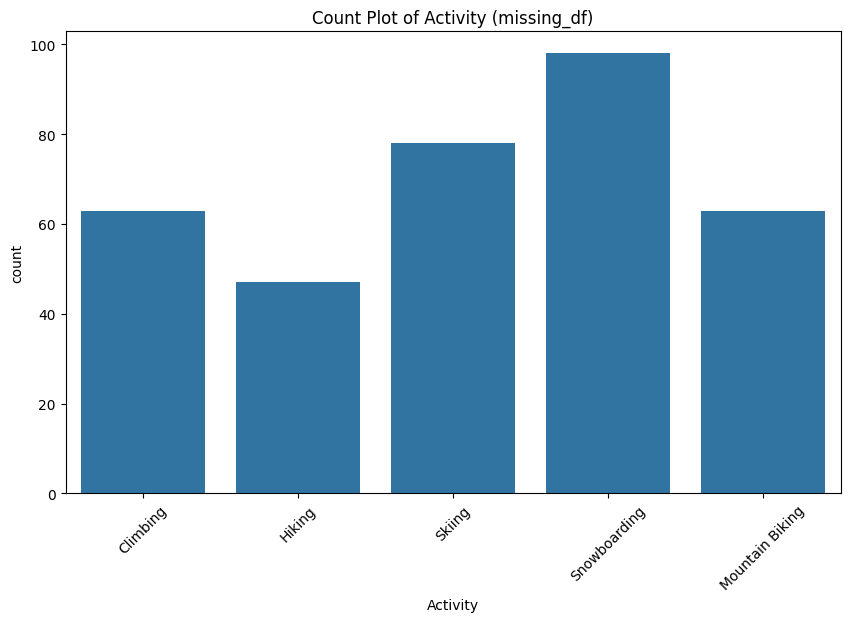

<Figure size 640x480 with 0 Axes>

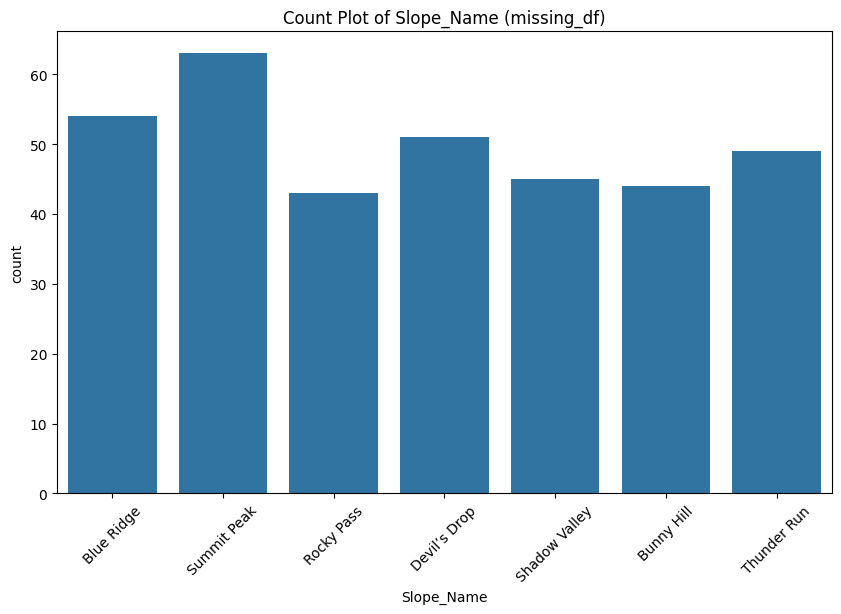

<Figure size 640x480 with 0 Axes>

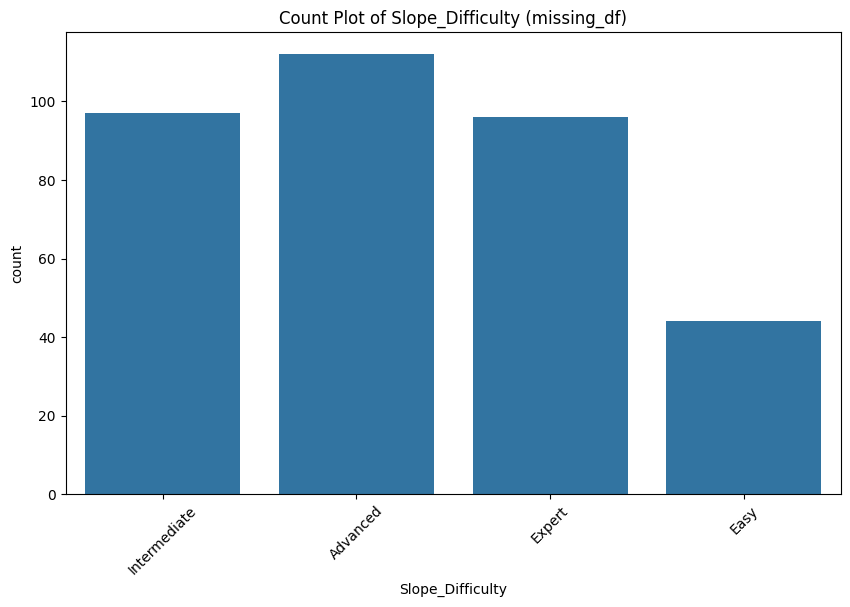

<Figure size 640x480 with 0 Axes>

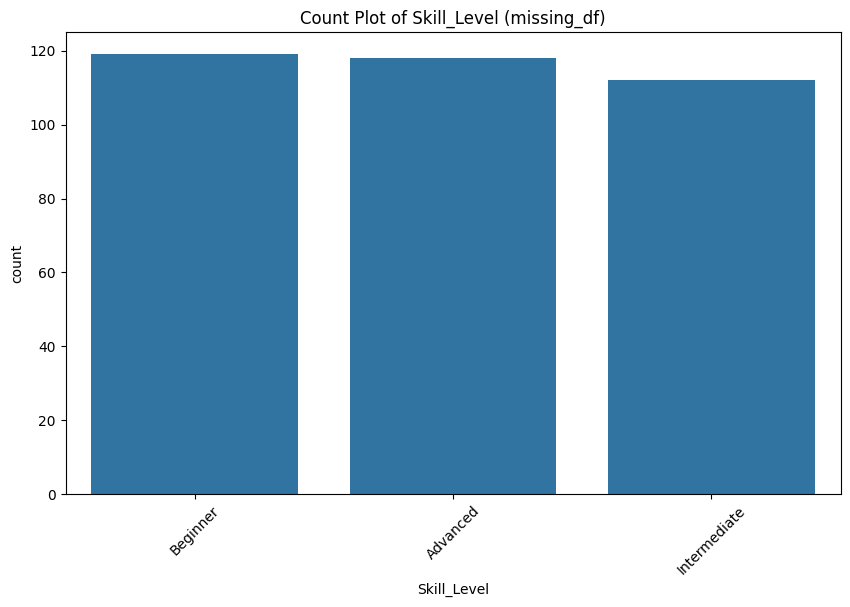

<Figure size 640x480 with 0 Axes>

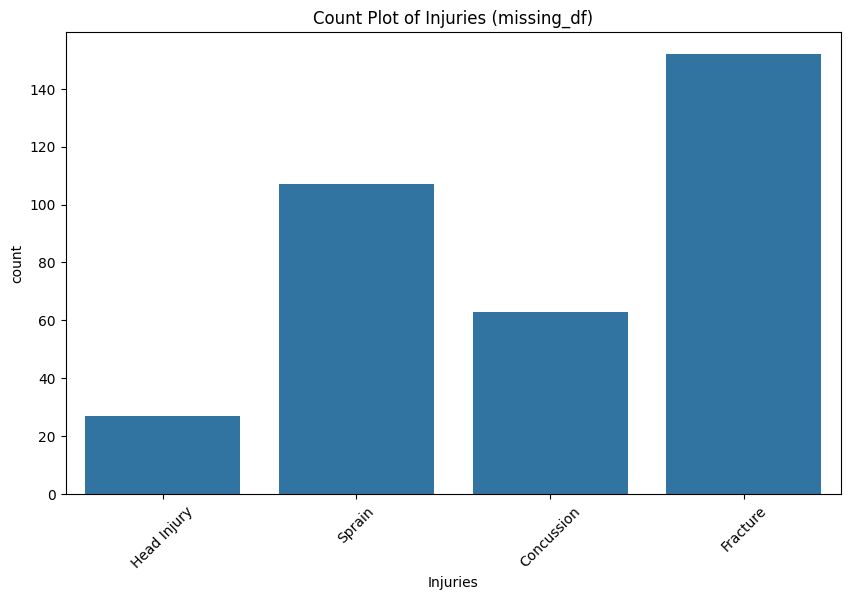

<Figure size 640x480 with 0 Axes>

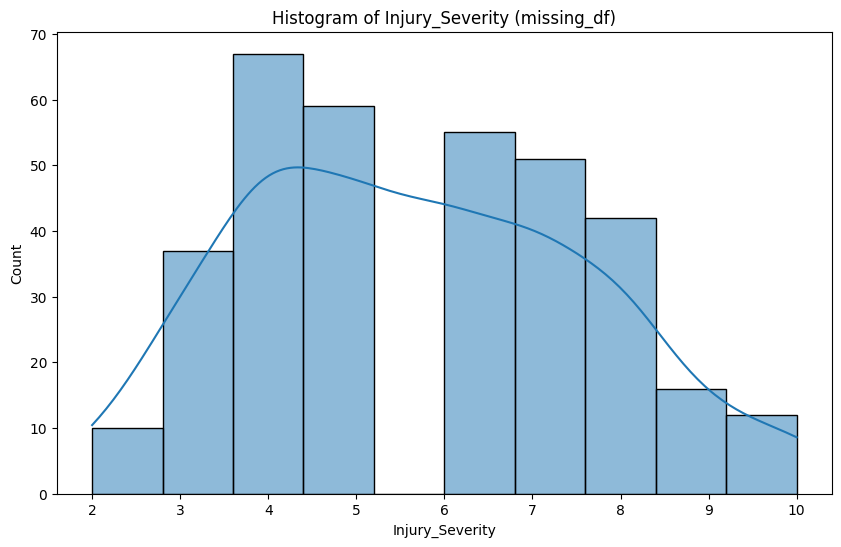

<Figure size 640x480 with 0 Axes>

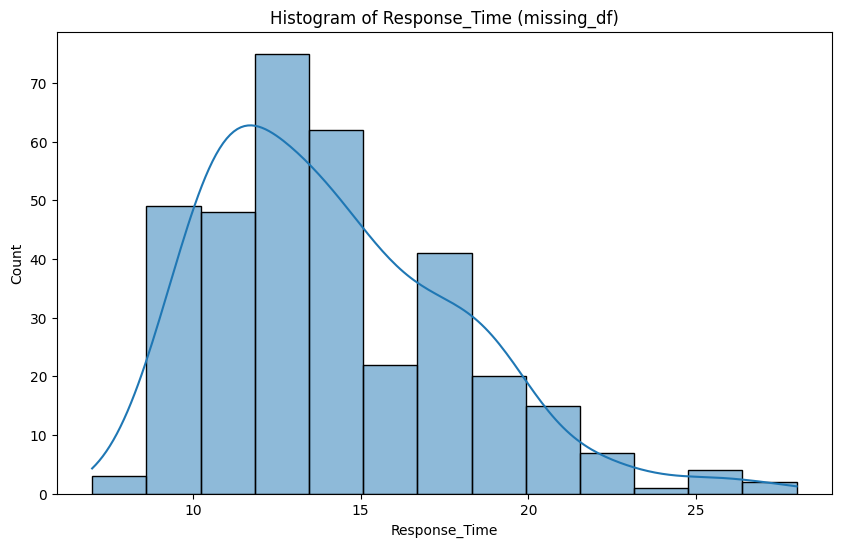

<Figure size 640x480 with 0 Axes>

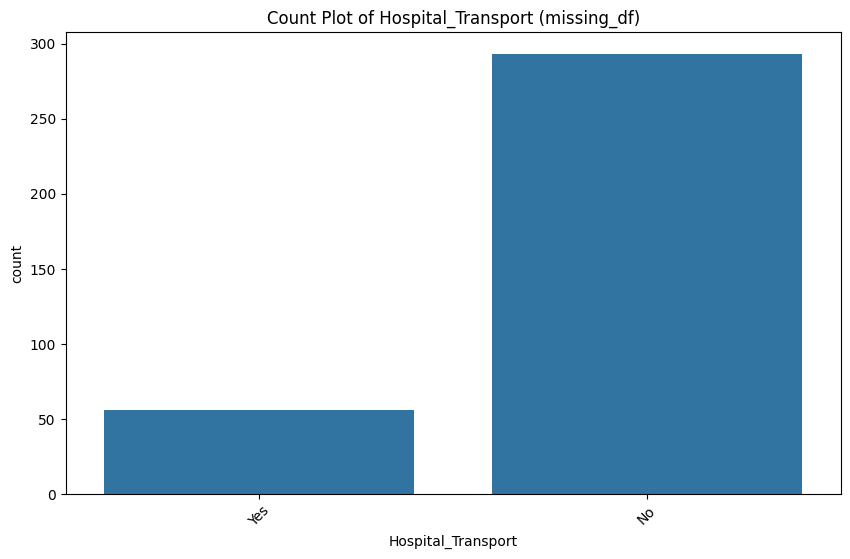

<Figure size 640x480 with 0 Axes>

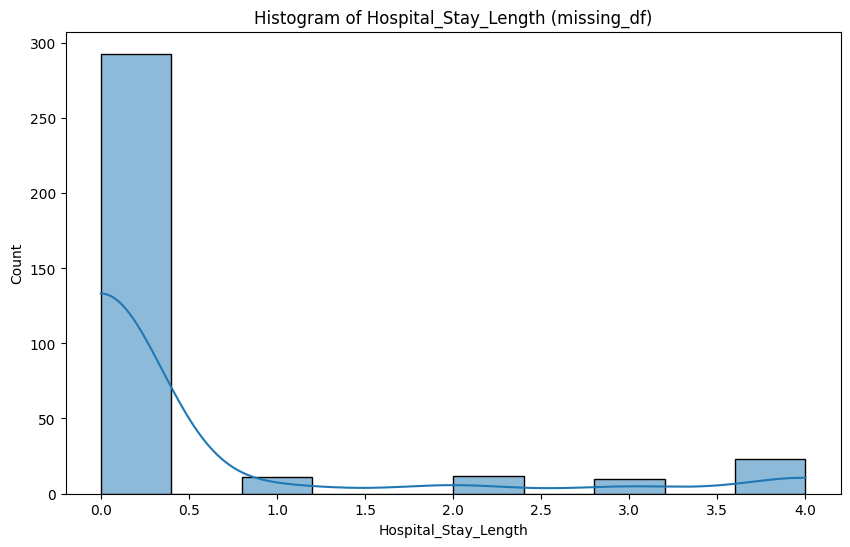

<Figure size 640x480 with 0 Axes>

In [14]:
skip_cols = ['Incident_ID', 'Customer_ID', 'Protective_Gear']

for col in missing_df.columns:
    if col not in skip_cols:
        plt.figure(figsize=(10, 6))

        if missing_df[col].dtype == 'object':
            sns.countplot(x = col, data=missing_df)
            plt.title(f'Count Plot of {col} (missing_df)')
            plt.xticks(rotation=45)
        else:
            sns.histplot(x = col, data=missing_df, kde=True)
            plt.title(f'Histogram of {col} (missing_df)')

        plt.show()
        plt.tight_layout()

In [15]:
non_missing_df = incidents_df[~incidents_df['Protective_Gear'].isna()]

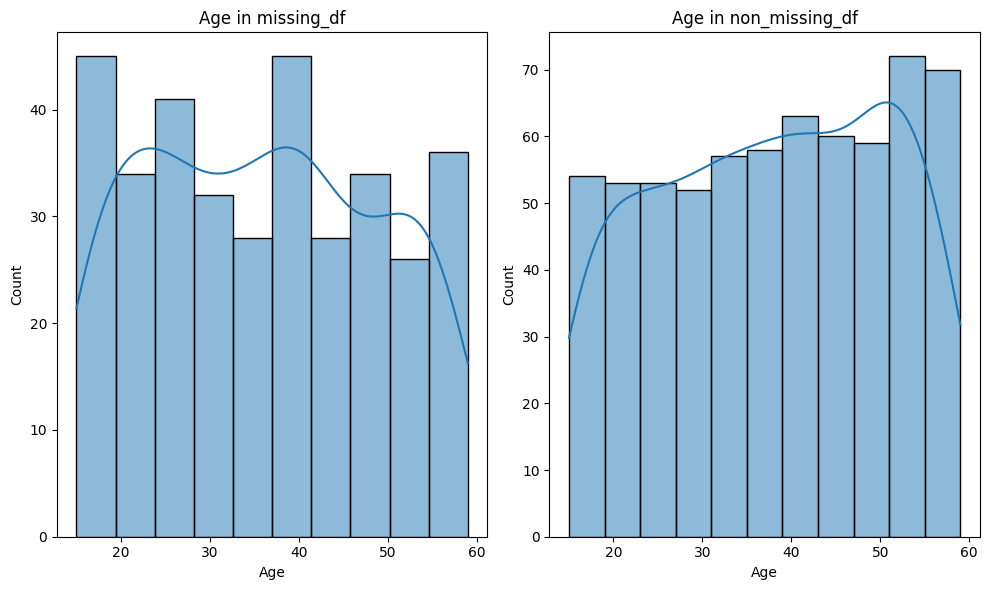

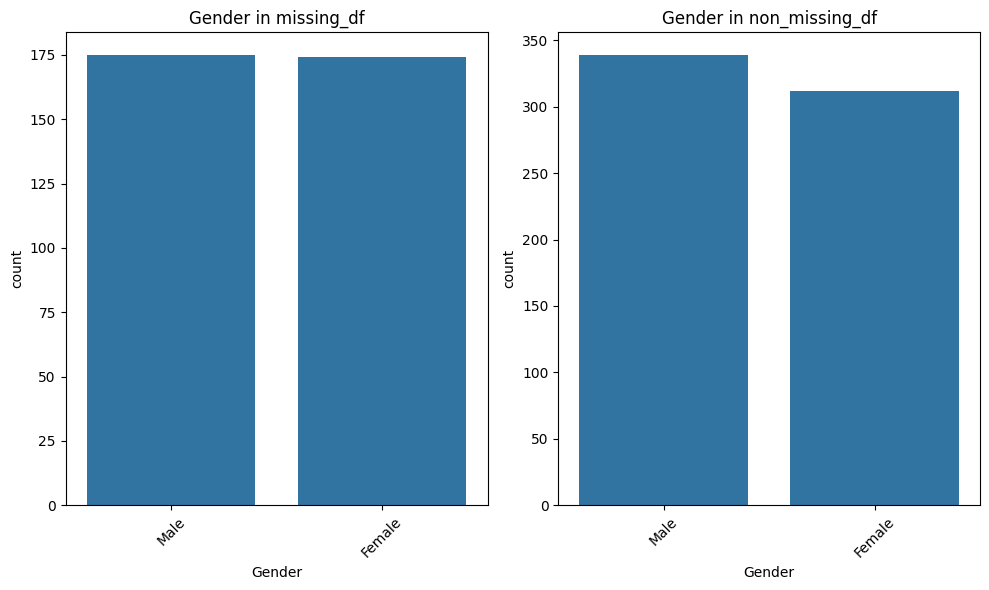

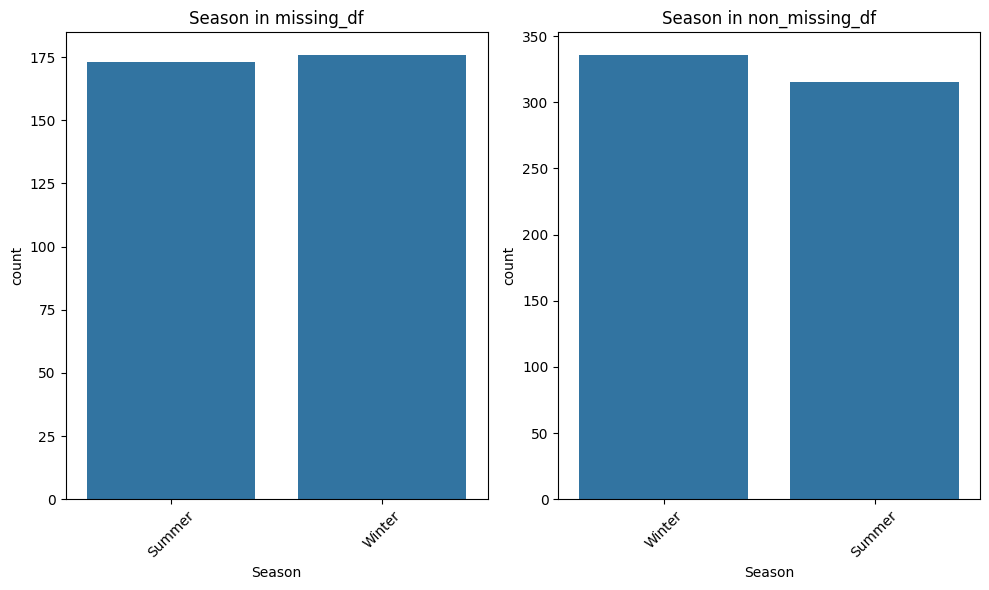

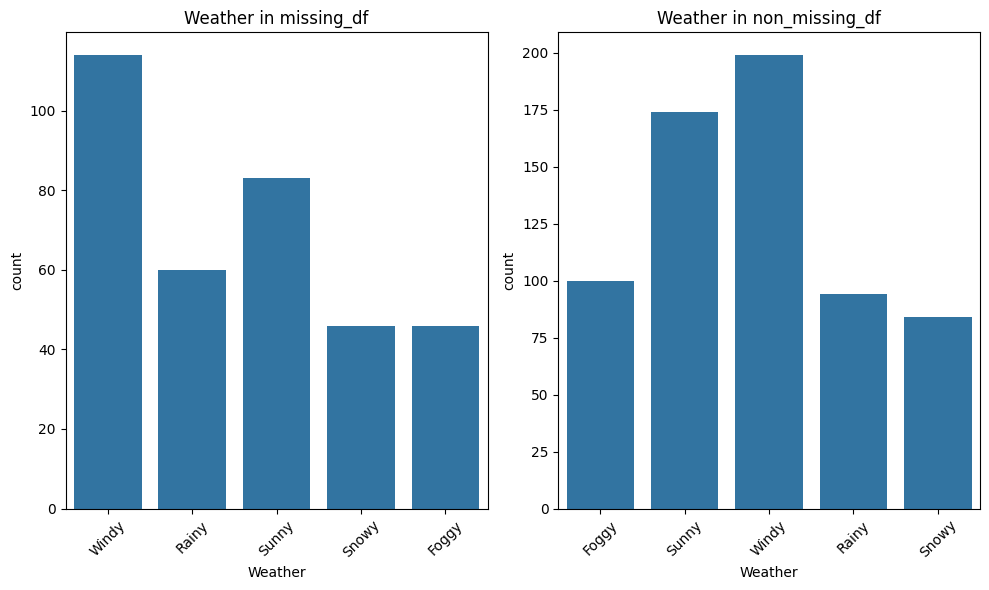

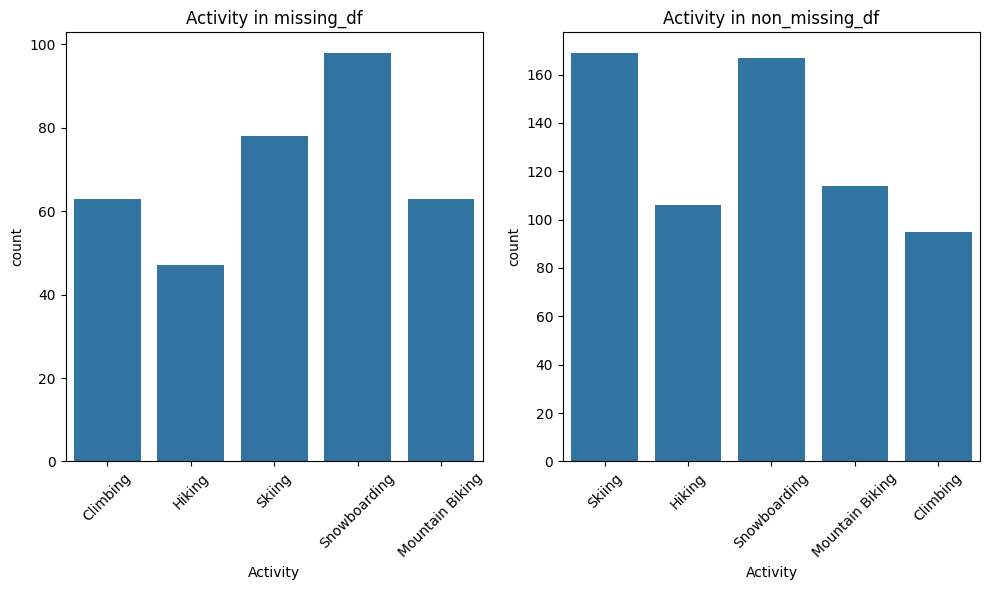

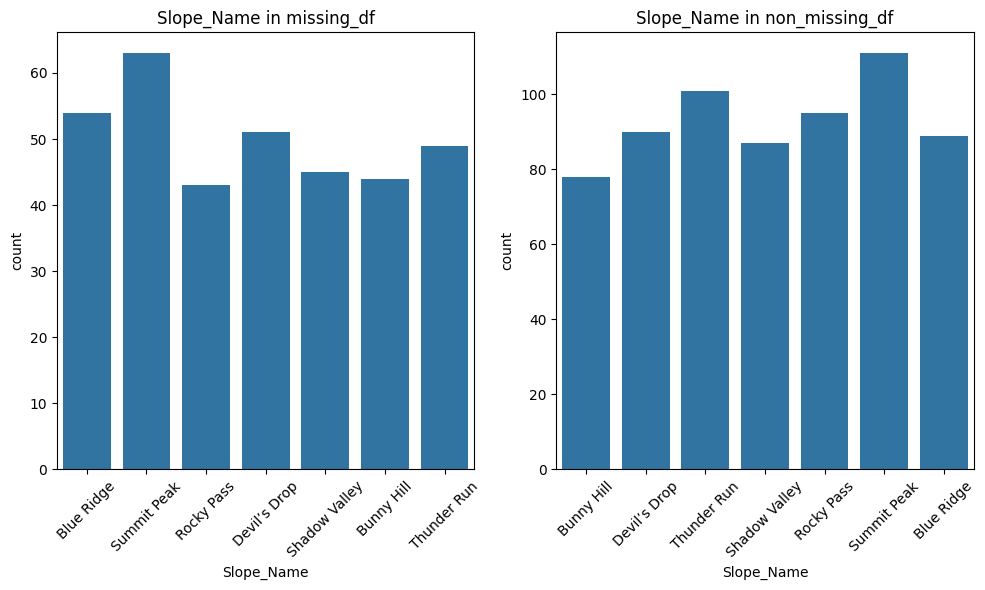

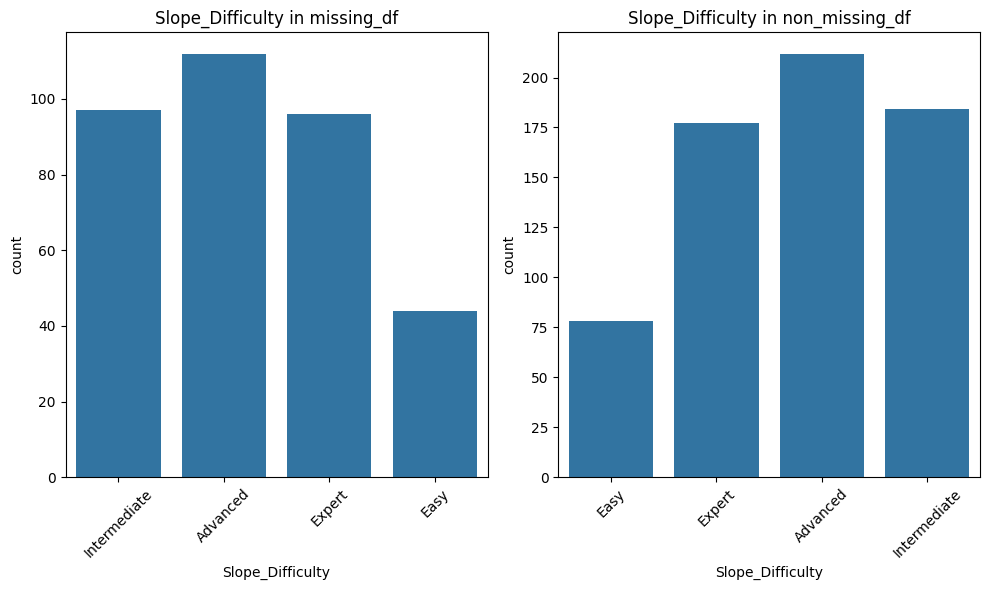

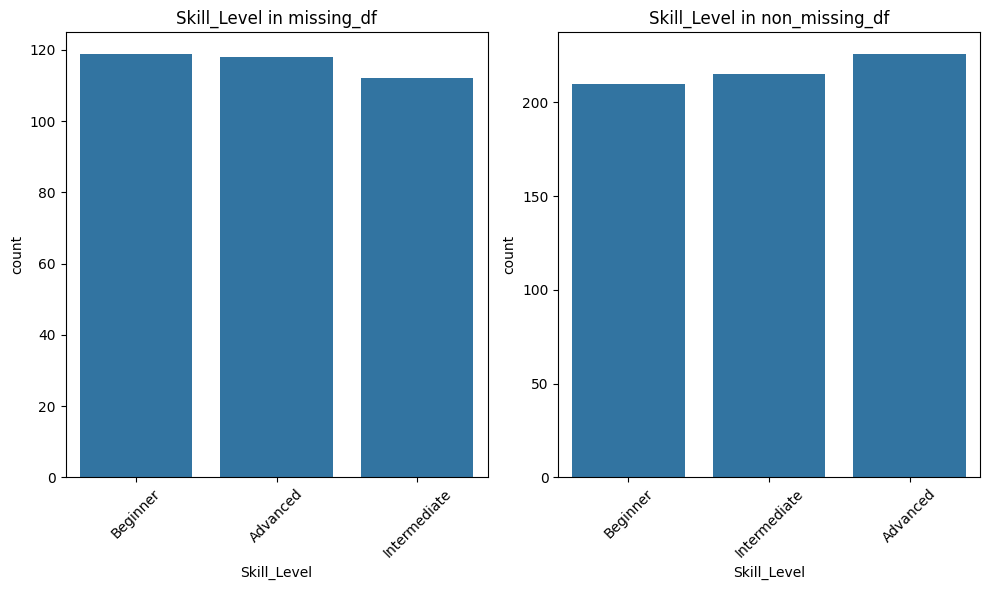

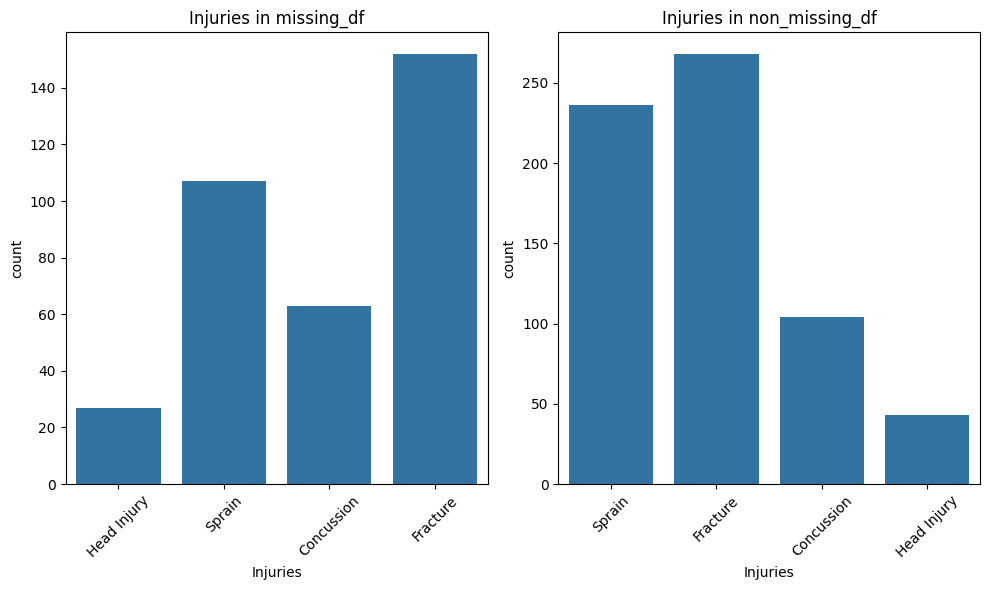

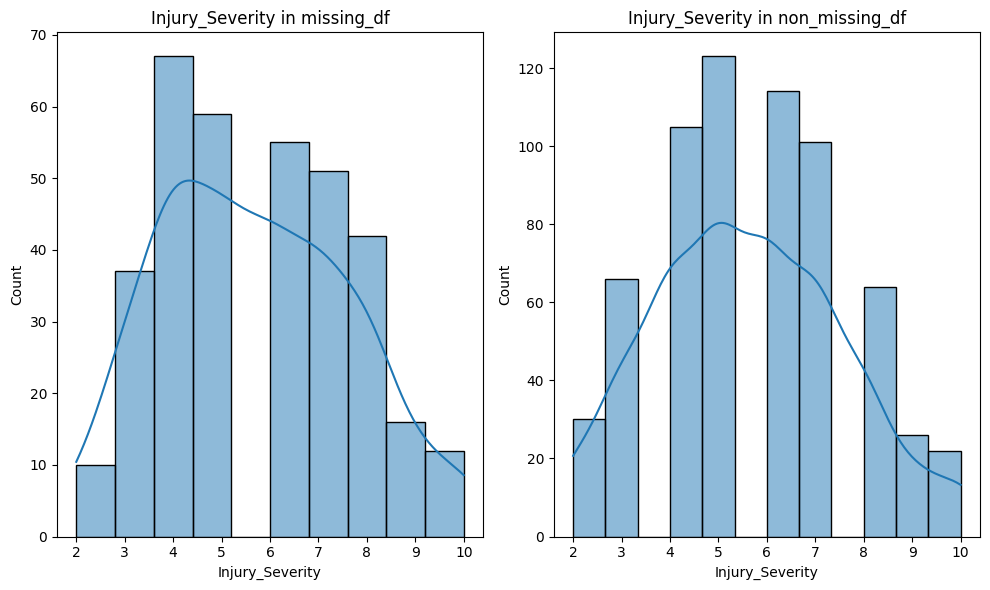

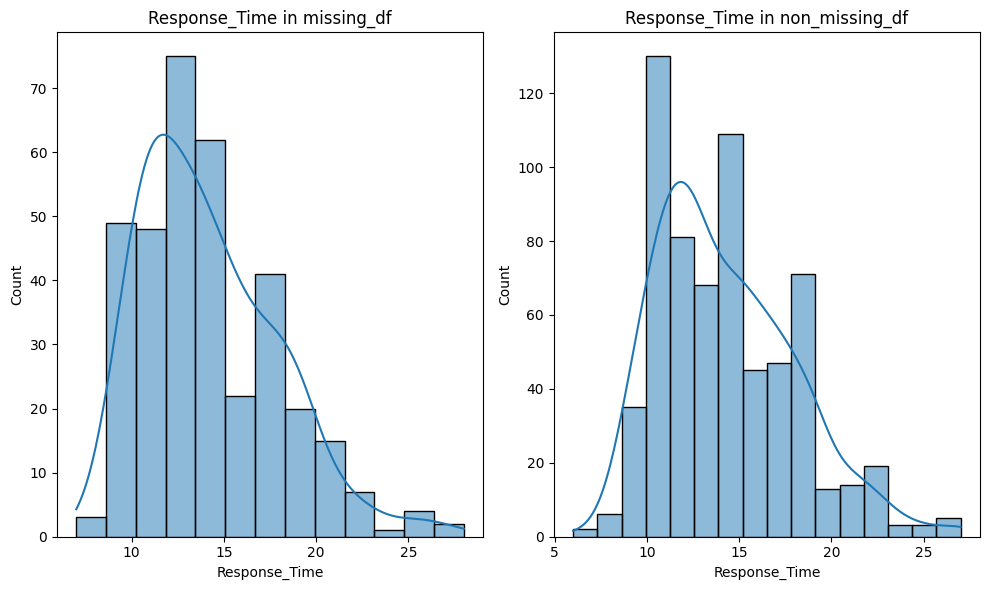

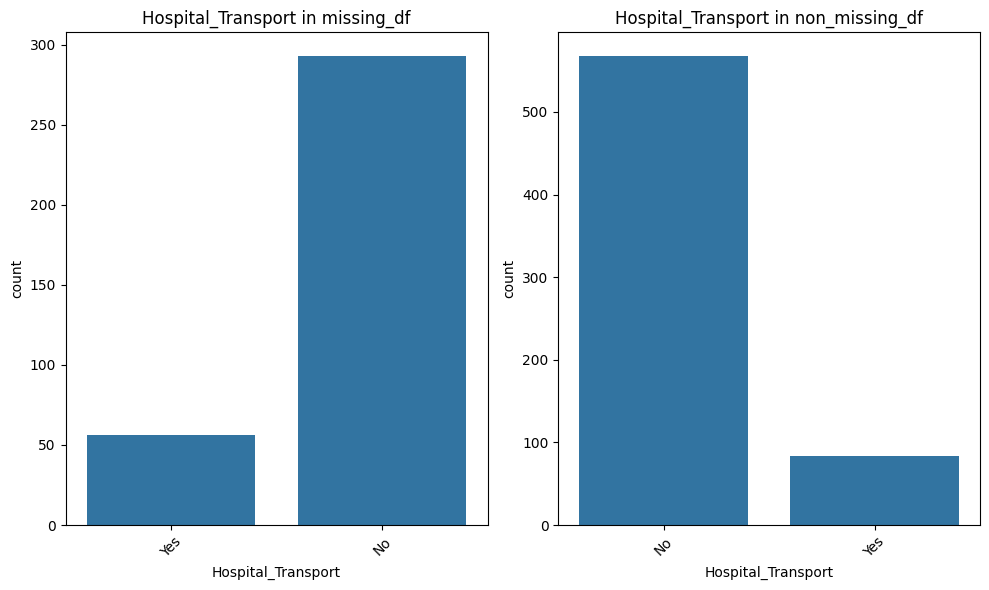

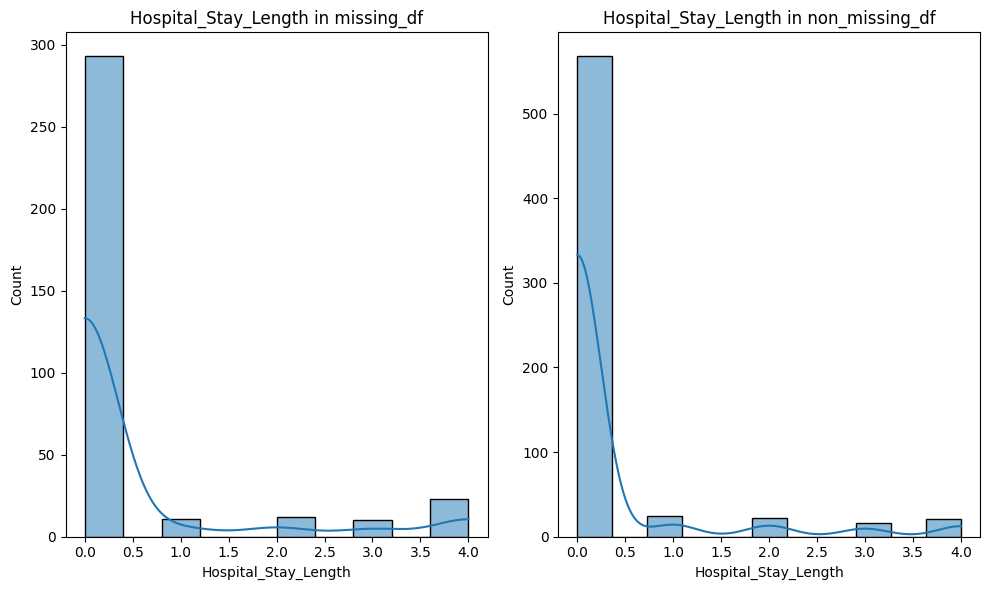

In [16]:
for col in incidents_df.columns:
    if col not in skip_cols:
        plt.figure(figsize=(10, 6))

        if incidents_df[col].dtype == "object":
            plt.subplot(1, 2, 1)
            sns.countplot(x=col, data=missing_df)
            plt.title(f"{col} in missing_df")
            plt.xticks(rotation=45)
            
            plt.subplot(1, 2, 2)
            sns.countplot(x=col, data=non_missing_df)
            plt.title(f"{col} in non_missing_df")
            plt.xticks(rotation=45)
            
        else:
            plt.subplot(1, 2, 1)
            sns.histplot(missing_df[col], kde=True)
            plt.title(f"{col} in missing_df")
            
            plt.subplot(1, 2, 2)
            sns.histplot(non_missing_df[col], kde=True)
            plt.title(f"{col} in non_missing_df")
        
        plt.tight_layout()
        plt.show()

In [19]:
%pip install scipy
from scipy.stats import chi2_contingency

weather_protective_gear = pd.crosstab(incidents_df['Weather'], incidents_df['Protective_Gear'])
print(weather_protective_gear)

activity_protective_gear = pd.crosstab(incidents_df['Activity'], incidents_df['Protective_Gear'])
print(activity_protective_gear)


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\quydu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 463.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
    --------------------------------------- 0.7/41.2 MB 14.6 MB/s eta 0:00:03
   - -------------------------------------- 1.7/41.2 MB 17.7 MB/s eta 0:00:03
   -- ------------------------------------- 2.6/41.2 MB 18.7 MB/s eta 0:00:03
   --- ------------------------------------ 3.4/41.2 MB 19.9 MB/s eta 0:00:02
   ---- ----------------------------------- 4.5/41.2 MB 20.6 MB/s eta 0:00:02
   ----- ---------------------------------- 5.7/41.2 MB 21.4 MB/s eta 0:00:02
   ------ --------------------------------- 7.0/41.2 MB 22.5 MB/s eta 0:00:02
   -------- ------------------------------- 8.4/41.2 MB 23.3 MB/s eta 0:00:02
 

In [20]:
chi2, p, dof, expected = chi2_contingency(weather_protective_gear)
print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected:")
print(expected)

Chi2: 3.120142604633028
p-value: 0.5379249687987882
Degrees of Freedom: 4
Expected:
[[49.76958525 50.23041475]
 [46.78341014 47.21658986]
 [41.80645161 42.19354839]
 [86.59907834 87.40092166]
 [99.04147465 99.95852535]]


In [21]:
chi2, p, dof, expected = chi2_contingency(activity_protective_gear)
print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected:")
print(expected)

Chi2: 3.1540974041149266
p-value: 0.5323767456150674
Degrees of Freedom: 4
Expected:
[[47.28110599 47.71889401]
 [52.75576037 53.24423963]
 [56.73732719 57.26267281]
 [84.11059908 84.88940092]
 [83.11520737 83.88479263]]


In [22]:
incidents_df['Protective_Gear'] = incidents_df['Protective_Gear'].fillna('Unknown')

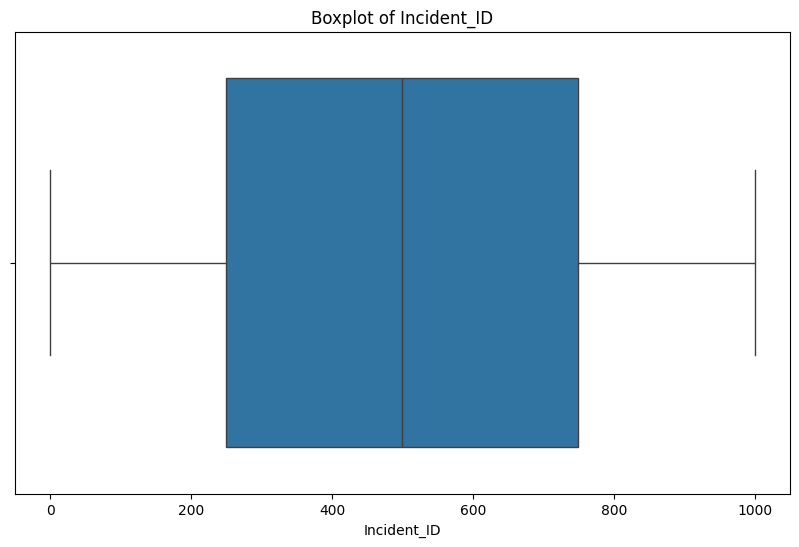

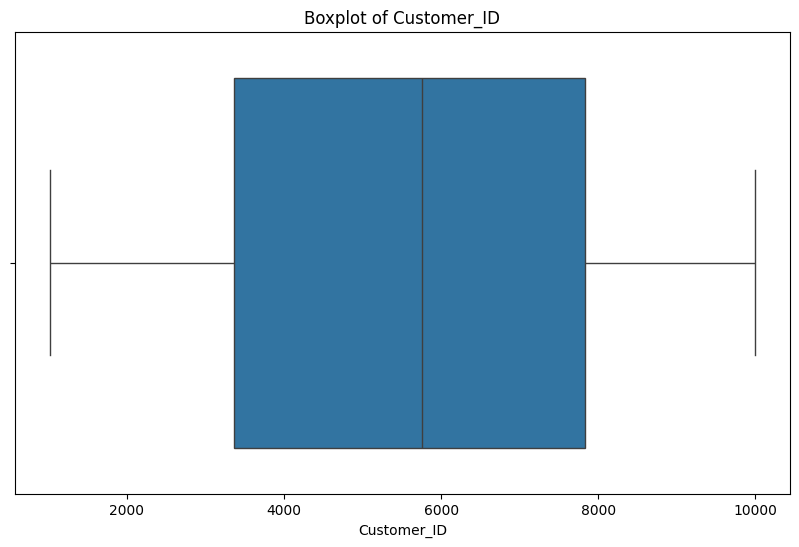

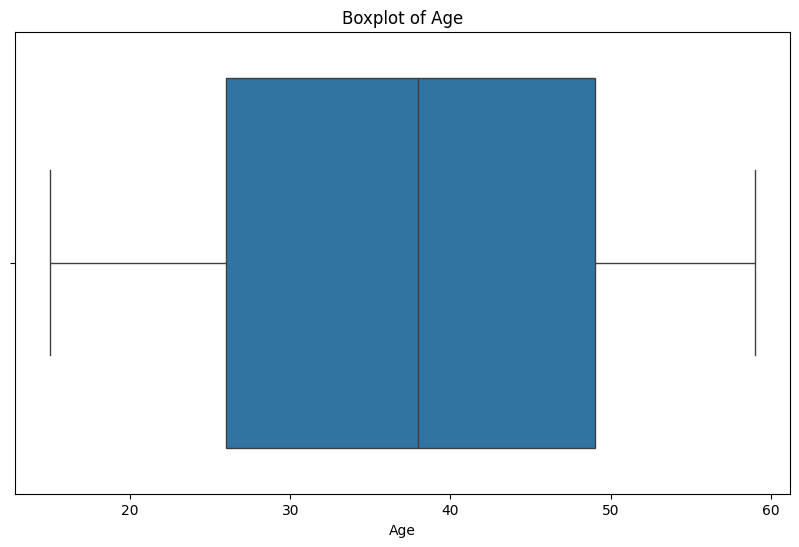

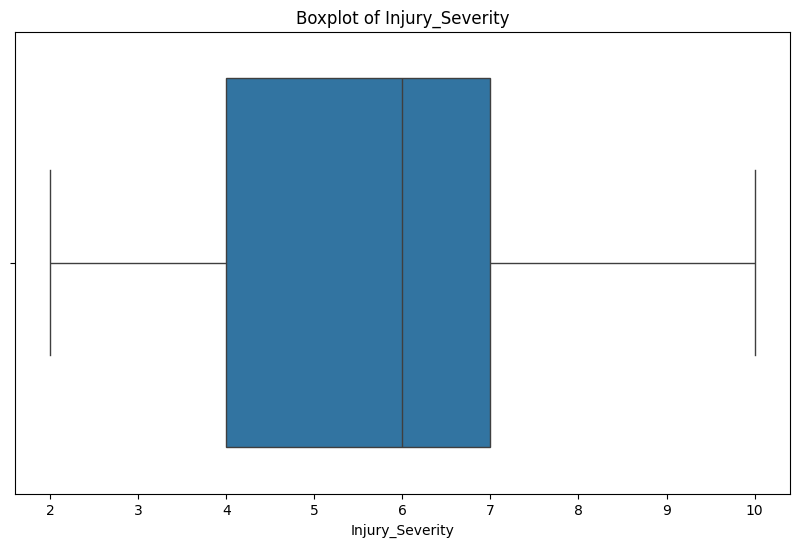

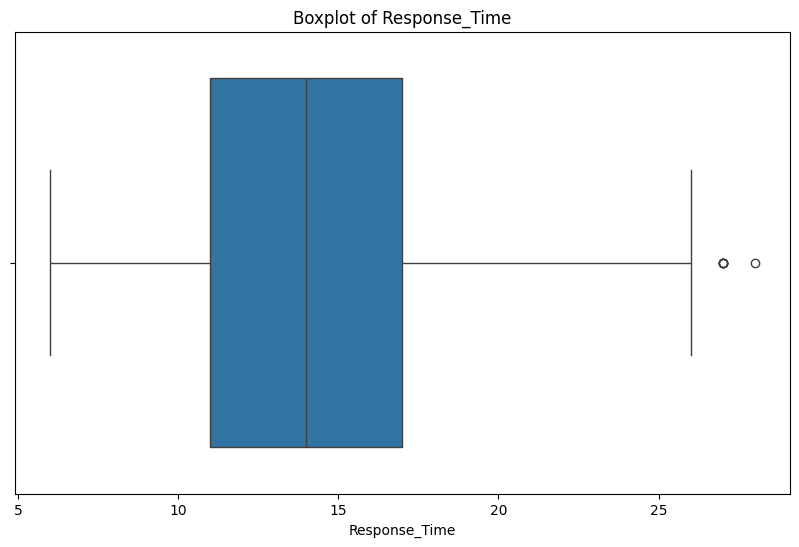

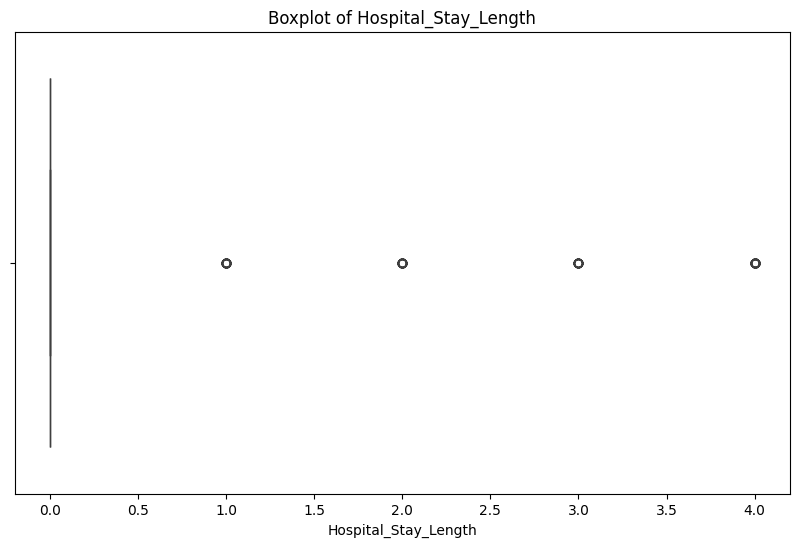

In [24]:
numeric_cols = incidents_df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x = incidents_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [26]:
incidents_df.to_csv('data/incidents_cleaned.csv', index=False)